In [ ]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

Rethinking Employee Churn Modeling
Employee churn refers to the phenomenon where employees voluntarily leave an organization—even though they are still considered valuable by the company. The typical question is: “Can I predict which employee is likely to leave the organization so I can step in early enough to prevent it?”

But here's the catch: if your goal is to intervene and change the outcome, simply predicting that someone will leave isn't enough. Knowing who might leave doesn’t tell you why.

This is where diagnostic analytics becomes crucial. Rather than focusing solely on prediction, we should be asking: What are the root causes or patterns behind employee exits? Understanding these drivers allows for more effective, targeted strategies to improve retention—before employees ever reach the tipping point.
Source:https://eric-sandosham.medium.com/the-problem-with-employee-churn-modelling-51f10a26cf58.

Understanding Employee Attrition: A Data-Driven Approach
Knowing when and why employees are likely to leave can help organizations take proactive steps to improve retention and plan hiring needs more effectively. In this analysis, we’ll use a machine learning approach that’s broadly applicable to similar predictive problems.

Our Key Objectives:
Predict the likelihood of an active employee leaving the company.

Identify the key factors or warning signs that signal an employee might churn.

Recommend strategic actions or policy changes that can improve employee retention based on the model’s insights.

This study is inspired by the project shared here on Kaggle

In [ ]:
df = pd.read_csv('/Users/prachijhamb/Downloads/HR_comma_sep.csv')
df.head()


In [ ]:
df.info()

In [ ]:
def explain(attribute):
    features= {'satisfaction_level': "It is employee satisfaction point, which ranges from 0-1.",
    'last_evaluation': 'It is evaluated performance by the employer, which also ranges from 0-1.',
    'number_projects': 'How many of projects assigned to an employee?',
    'average_monthly_hours': 'How many hours in averege an employee worked in a month?',
    'time_spent_company': 'time_spent_company means employee experience. The number of years spent by an employee in the company.',
    'work_accident': 'Whether an employee has had a work accident or not.',
    'promotion_last_5years': 'Whether an employee has had a promotion in the last 5 years or not.',
    'Department': "Employee's working department/division.",
    'Salary': "Salary level of the employee such as low, medium and high.",
    'left': "Whether the employee has left the company or not."}
    return features[attribute]

Data Insights
In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. 

In [ ]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str
display(summary(df).sort_values(by='Nulls', ascending=False))

In [ ]:
df=df.rename({'Department ':'Department'},axis=1)

In [16]:
print('Unique Values of Each Features:\n')
for i in df:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

Unique Values of Each Features:

satisfaction_level:
[0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

last_evaluation:
[0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

n

print out the percentage distribution of values in the specified column ("left"), in descending order of the unique values in that column.

In [17]:
def perc_col(df,col):
    for i in sorted(df[col].unique(),reverse=True):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

perc_col(df,'left')

1: %23.81
0: %76.19


How does the promotion status affect employee churn?
How does years of experience affect employee churn?
How does workload affect employee churn?
How does the salary level affect employee churn?

<Axes: >

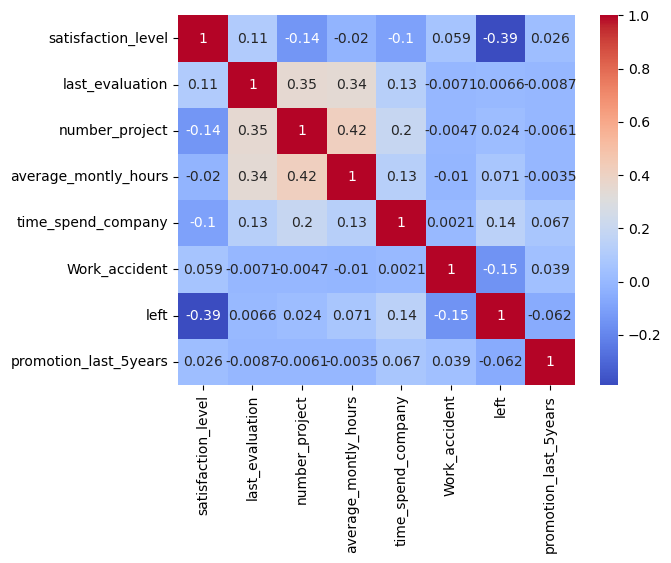

In [ ]:
#generate a heatmap of the correlation matrix for all the numeric columns
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")


salary,low,medium,high
left,29.7,20.4,6.6


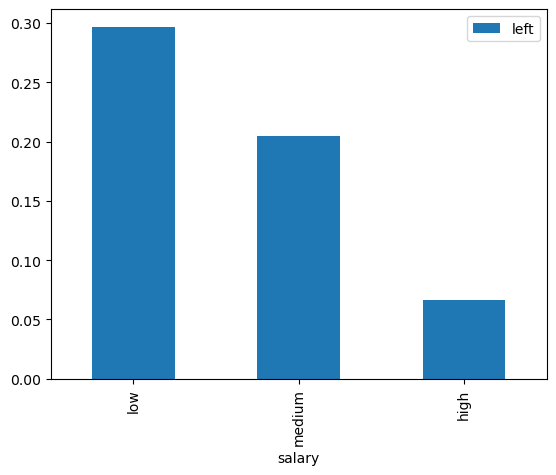

In [ ]:
# Churn ratio of employee by Salary
pd.DataFrame(df.groupby('salary')['left'].mean()).sort_values('left',ascending=False).plot(kind='bar')
pd.DataFrame(df.groupby('salary')['left'].mean()).sort_values('left',ascending=False).round(3).T*100

Department,hr,accounting,technical,support,sales,marketing,IT,product_mng,RandD,management
left,29.1,26.6,25.6,24.9,24.5,23.7,22.2,22.0,15.4,14.4


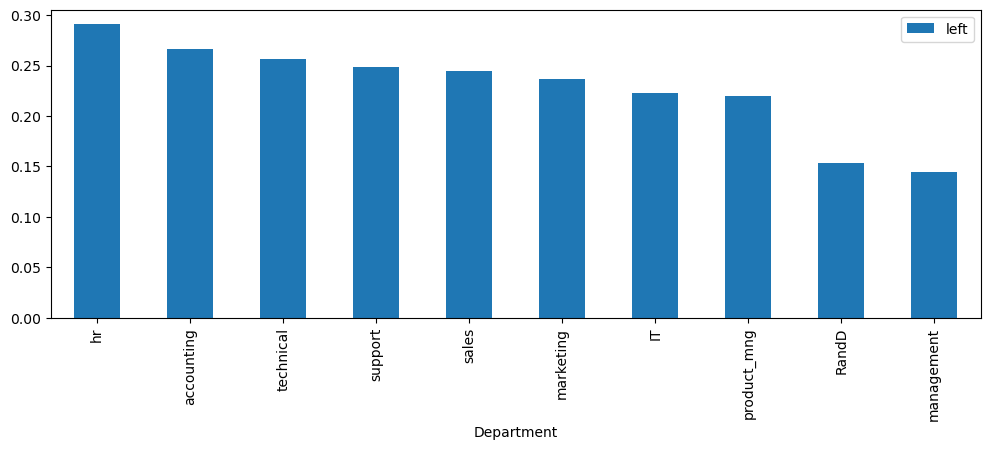

In [22]:
# Churn ratio of employee by Department
pd.DataFrame(df.groupby('Department')['left'].mean()).sort_values('left',ascending=False).plot(kind='bar',figsize=(12,4))
pd.DataFrame(df.groupby('Department')['left'].mean()).sort_values('left',ascending=False).round(3).T*100

Data Pre-Processing
Label Encoding¶
Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn will do this for you. You can use the LabelEncoder class to do this. The LabelEncoder class is used to convert categorical labels into numerical labels. It is a part of the sklearn.preprocessing module. The LabelEncoder class has two main methods: fit and transform. The fit method is used to fit the encoder to the data, and the transform method is used to transform the data into numerical labels.

In [ ]:
#randomly select 5 rows from the DataFrame df, but only display the columns 'Department' and 'salary'.
df[['Department','salary']].sample(5)

,Department,salary
7542,IT,medium
10547,sales,medium
13967,management,high
6965,sales,low
6068,technical,medium


In [24]:
from sklearn.preprocessing import LabelEncoder
df['Department']=LabelEncoder().fit_transform(df[['Department']])
df['salary']=LabelEncoder().fit_transform(df[['salary']])

Feature Scaling in Machine Learning
Some machine learning algorithms are pretty sensitive to the scale of your data, while others don’t really care. Algorithms that rely on gradient descent—like linear regression, logistic regression, and neural networks—work best when the input features are scaled properly. Similarly, distance-based algorithms like K-Nearest Neighbors (KNN), K-Means clustering, and Support Vector Machines (SVM) are heavily influenced by the range of your features because they calculate distances between data points.

That’s where feature scaling comes in. It helps ensure that no single feature dominates simply because of its scale.

In [25]:
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df),
                         columns=df.columns)
df_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,1.788917,-0.147412,0.393725,-0.554955
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,1.788917,-0.147412,0.393725,1.043004
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,1.788917,-0.147412,0.393725,1.043004
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,1.788917,-0.147412,0.393725,-0.554955
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,1.788917,-0.147412,0.393725,-0.554955


In [ ]:
Split Data as Train and Test Set¶
Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

Split Data as Train and Test Set¶
Here, Dataset is broken into two parts in order to train and test the model. The training set is used to train the model, while the test set is used to evaluate the model's performance. The split is typically done in a 70:30 or 80:20 ratio, depending on the size of the dataset. In this case, we will use an 80:20 split.

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN

X=df.drop('left',axis=1)
y=df.left
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
y_train.value_counts()

left
0    9134
1    2865
Name: count, dtype: int64

In [28]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import accuracy_score,f1_score, recall_score, classification_report,confusion_matrix,precision_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
gbc = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbc.predict(X_test)

In [29]:
#Evaluating Model Performance
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[2268   26]
[ 53 653]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2294
           1       0.96      0.92      0.94       706

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [30]:
gbc_accuracy = accuracy_score(y_test, y_pred)
gbc_f1_score = f1_score(y_test, y_pred, average='weighted')
gbc_recall = recall_score(y_test, y_pred, average='weighted')
print('gbc_accuracy:',gbc_accuracy,
      '\ngbc_f1_score:',gbc_f1_score,
      '\ngbc_recall:',gbc_recall)

gbc_accuracy: 0.9736666666666667 
gbc_f1_score: 0.9734870193855906 
gbc_recall: 0.9736666666666667


In [32]:
#Tunning
gbc = GradientBoostingClassifier()
gbc_params = {"n_estimators": [50,100,300],
             "subsample":[0.1,0.5,1],
             "max_depth":[3,7,9],
             "learning_rate":[0.1,0.01,0.3]}

In [33]:
gbc_tuned = GradientBoostingClassifier(learning_rate= 0.5, 
                        max_depth= 9, 
                        n_estimators= 300, 
                        subsample= 1).fit(X_train, y_train)

y_pred = gbc_tuned.predict(X_test)

In [34]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[2282   12]
[ 29 677]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [35]:
gbc_accuracy = accuracy_score(y_test, y_pred)
gbc_f1_score = f1_score(y_test, y_pred, average='weighted')
gbc_recall = recall_score(y_test, y_pred, average='weighted')
print('gbc_accuracy:',gbc_accuracy,
      '\ngbc_f1_score:',gbc_f1_score,
      '\ngbc_recall:',gbc_recall)

gbc_accuracy: 0.9863333333333333 
gbc_f1_score: 0.9862752859405587 
gbc_recall: 0.9863333333333333


In [36]:
gbc_f1_true=float(classification_report(y_test, y_pred).split()[12])
gbc_f1_true

0.97

Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [38]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[2286    8]
[ 26 680]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [39]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.9886666666666667 
rfc_f1_score: 0.9886156409631833 
rfc_recall: 0.9886666666666667


In [40]:
rf_f1_true=float(classification_report(y_test, y_pred).split()[12])
rf_f1_true

0.98

XGBoost Classifer

In [41]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(X_train , y_train)
y_pred = xgb.predict(X_test)

In [42]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[2282   12]
[ 25 681]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [43]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.9876666666666667 
xgb_f1_score: 0.9876267875797684 
xgb_recall: 0.9876666666666667


Tuning the Model

In [47]:
xgb = XGBClassifier()
xgb_params = {"n_estimators": [50,500,1000],
             "subsample":[0.1,0.5,1],
             "max_depth":[3,7,9],
             "learning_rate":[0.1,0.01,0.3]}
xgb_tuned = XGBClassifier(learning_rate= 0.1, 
                                max_depth= 9, 
                                n_estimators= 500, 
                                subsample= 1).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)
xgb_tuned = XGBClassifier(learning_rate= 0.1, 
                                max_depth= 11, 
                                n_estimators= 600, 
                                subsample= 1).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[2286    8]
[ 27 679]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [48]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.9883333333333333 
xgb_f1_score: 0.9882778264377381 
xgb_recall: 0.9883333333333333


In [49]:
xgb_f1_true=float(classification_report(y_test, y_pred).split()[12])
xgb_f1_true

0.97

KNeighborsClassifer

In [53]:
X=df_scaled.drop('left',axis=1)
y=df.left
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
neighbors = range(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [55]:
knn_tuned= KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[2234   60]
[ 34 672]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2294
           1       0.92      0.95      0.93       706

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [56]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1_score = f1_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
print('knn_accuracy:',knn_accuracy,
      '\nknn_f1_score:',knn_f1_score,
      '\nknn_recall:',knn_recall)

knn_accuracy: 0.9686666666666667 
knn_f1_score: 0.9688606421351361 
knn_recall: 0.9686666666666667


In [57]:
knn_f1_true=float(classification_report(y_test, y_pred).split()[12])
knn_f1_true

0.93

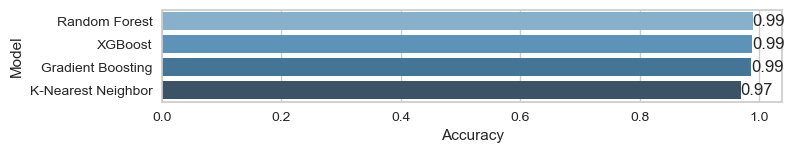

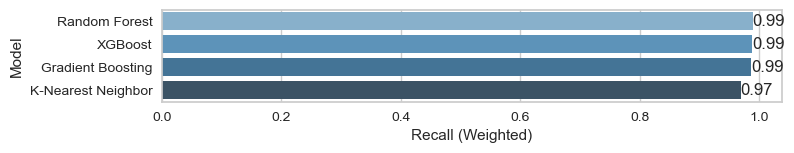

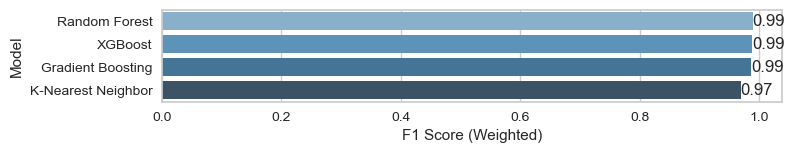

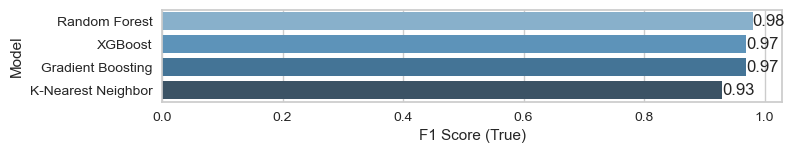

In [58]:
compare = pd.DataFrame({"Model": ["Random Forest", "XGBoost","Gradient Boosting","K-Nearest Neighbor"],
                        "Accuracy": [rfc_accuracy, xgb_accuracy, gbc_accuracy,knn_accuracy],
                        "F1 Score": [rfc_f1_score, xgb_f1_score, gbc_f1_score, knn_f1_score],
                        "Recall": [rfc_recall, xgb_recall, gbc_recall,knn_recall],
                        "F1 Score (True)": [rf_f1_true, xgb_f1_true, gbc_f1_true, knn_f1_true]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
        
plt.subplot(411)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('Recall (Weighted)')
plt.show()

plt.subplot(413)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('F1 Score (Weighted)')
plt.show()

plt.subplot(414)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score (True)", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

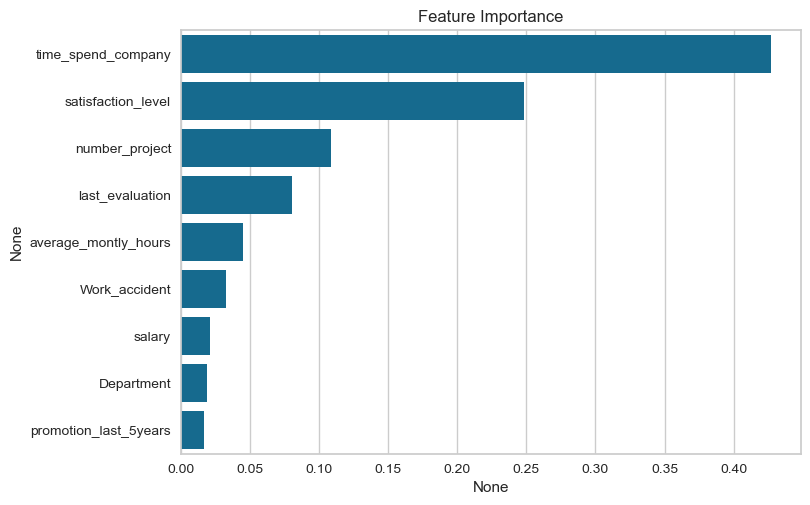

time_spend_company       0.427343
satisfaction_level       0.248470
number_project           0.108666
last_evaluation          0.080501
average_montly_hours     0.045144
Work_accident            0.032708
salary                   0.021305
Department               0.019104
promotion_last_5years    0.016759
dtype: float32

In [59]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]

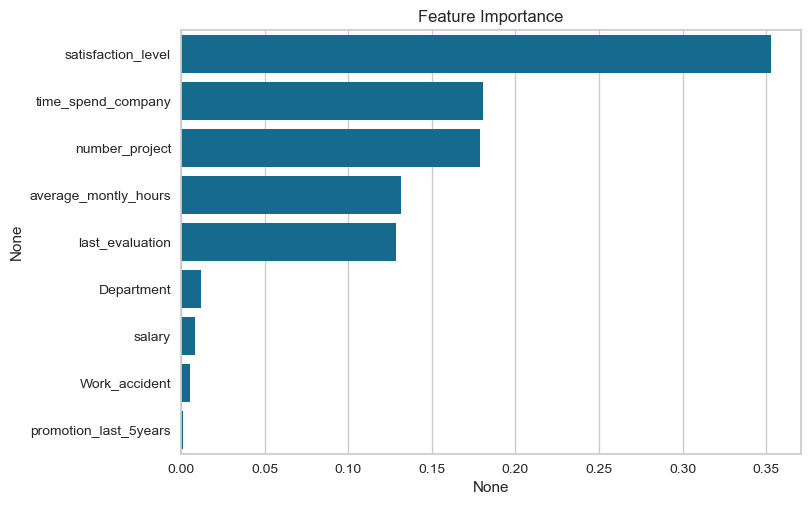

satisfaction_level       0.353146
time_spend_company       0.180566
number_project           0.178955
average_montly_hours     0.131485
last_evaluation          0.128503
Department               0.012221
salary                   0.008283
Work_accident            0.005623
promotion_last_5years    0.001218
dtype: float64

In [60]:
feature_imp = pd.Series(rf_model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]